# Twin Causal Examples
***
#### This notebook shows how to use the twin_causal python package. It uses twin network based deep learning architecture for estimating the conditional average treatment estimation.

### Import the twin network model from twincausal

In [1]:
import twincausal.utils.data as twindata
from twincausal.model import twin_causal
from sklearn.model_selection import train_test_split
from twincausal.utils.performance import qini_curve, qini_barplot


#uplift = twin_causal(input_size, hlayers=1, nb_neurons=128, negative_slope=0, epochs = 100, 
#                     batch_size=256, learningRate=0.05, reg_type = 'L2', reg_constant=0.001, 
#                     prune=True, gpl_reg_constant=0.001, verbose=True, logs=True, save_model=False, 
#                     random_state=1234)

#uplift.fit(X, treat, Y)
#pred = uplift.predict(X_new)

In [2]:
X,T,Y = twindata.generator(5)

True adjusted Qini: 1.4619335919810603
True Risk: 5.2


### Initialize the twin_causal model

In [10]:
seed = 12345
input_size = 101
hlayer = 1
nb_neurons, reg_constant = 256, 0
loss = 'uplift_loss'
prune = True
struc_prune = 1
l_reg_constant = 0.001  # regularization on the weights
gpl_reg_constant = 0.0001 #include both of them

negative_slope = 0

epochs = 100
batch_size = 256
shuffle = True
learningRate = 0.005

verbose = False
plotit = True
logs = True
save_model = False

models = twin_causal(input_size,
                     hlayer,
                     negative_slope,
                     nb_neurons,
                     seed, 
                     epochs,
                     learningRate,
                     l_reg_constant,
                     gpl_reg_constant,
                     shuffle,
                     save_model, 
                     batch_size, 
                     struc_prune,
                     loss,
                     prune,                     
                     verbose,
                     plotit,
                     logs)

In [4]:
models

twin_causal(
  (fc_layer): LinearProximal(in_features=101, out_features=256, bias=True)
  (fc_output): LinearProximal(in_features=256, out_features=1, bias=True)
)

### Generate data according to the inbuilt data generator

In [3]:
#X,T,Y = models.generator(5) #generer les donnees par rapport au input size

True adjusted Qini: 2.068038475848249
True Risk: 1.0


In [5]:
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X,T,Y,test_size=0.3, random_state=1234)

### Fitting the model

input_size               101         
hlayers                  1           
negative_slope           0           
nb_neurons               256         
prune                    1           
struc_prune              1           
epochs                   100         
shuffle                  1           
batch_size               256         
seed                     12345       
verbose                  0           
logs                     1           
save_model               0           
plotit                   1           
Percent: [####################] 99.0% 99999999999%  

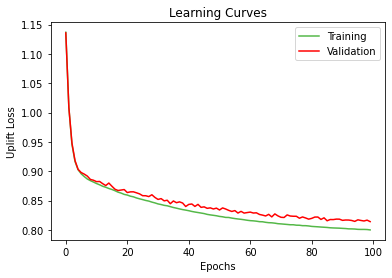

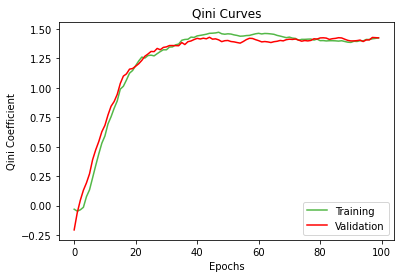

In [11]:
#train_err_epoch, qini_list_epoch = 
_,_ = models.fit(X_train,T_train,Y_train)   

### Predicting the uplift

In [38]:
#import torch
#models.load_state_dict(torch.load("runs/Models/twincausal/256/Model_epoch_77.pth"))

In [12]:
pred_uplift = models.predict(X_test)

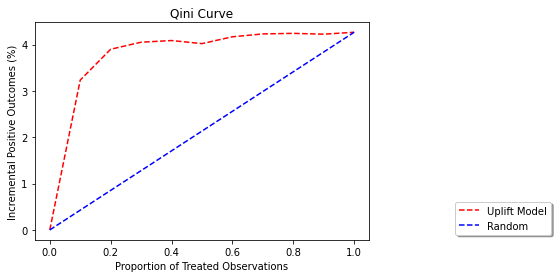

The Qini coefficient is: 1.5570584254791298


In [13]:
_, q = qini_curve(T_test, Y_test, pred_uplift, p_precision=1, plotit=True, name="")
print('The Qini coefficient is:', q)

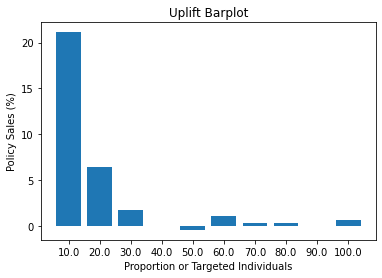

The Uplift correlation is: 0.47


In [14]:
_, tau = qini_barplot(T_test, Y_test, pred_uplift, p_precision=1, plotit=True)
print('The Uplift correlation is:', tau)